> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

>Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview
> The Movie Database (TMDb) is a community built movie and TV database. 

>I will try to anwser some questions might get in our minds when we see IMDB. 

#### Question that can analyised from this data set

    1. Movies with highest and lowest profit.
    2. The relation between expected revenue of movie and the release month.
    3. Most Frequent Cast.
    4. Features for Succesful Movies Criteria.


In [128]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
# # Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling Check the data



In [130]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_movies = pd.read_csv('tmdb-movies.csv')


In [131]:
r,c = df_movies.shape
print('we have here {} movies to analyse'.format(r))

we have here 10866 movies to analyse


In [132]:
print(df_movies.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      


### Data Cleaning
>1. We need to remove useless column such as id, imdb_id, vote_count, production_company, keywords, homepage.
>2. Removing the duplication in the rows.
>3. Some movies in this database have 0 budget and 0 revenue ,so we will be discarding such entries
>4. Change release date column into date format.


In [133]:
# remove useless columns
df_movies.drop(
    ['homepage', 'tagline', 'keywords', 'overview', 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj'], axis=1,
    inplace=True)
# remove any duplication
df_movies.drop_duplicates(keep ='first' , inplace=True)
# removing 0 budget and 0 revenue
df_movies = df_movies[(df_movies.budget != 0) & (df_movies.revenue != 0)]
#change release date to datatime format
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
r,c = df_movies.shape
print('Now after Cleaning the data we have here {} movies to analyse'.format(r))

Now after Cleaning the data we have here 3854 movies to analyse



### Functions will be needed later 

In [134]:
#check IDs with the highest and lowest values in given column
def check_highest_lowest(column_name):
    # calculate highest and lowest ids in that column
    idhigh = df_movies[column_name].idxmax()
    idlow = df_movies[column_name].idxmin()
    return idhigh, idlow

In [135]:
def split_column_values(column):
    data = column.str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Movies with highest and lowest profit)

In [136]:
# calculate the profit for each movie
df_movies.insert(2, 'profit' , df_movies['revenue'] - df_movies['budget'])
# check which movies has the highest and the lowest profit
idmax, idmin = check_highest_lowest('profit')

print('{} has the highest profit in all time with {} dollars profit'.format(
    df_movies['original_title'][idmax], df_movies['profit'][idmax]))

if df_movies['profit'][idmin] < 0:
    print('{} has the highest loss in all time with {} dollars loss'
      .format(df_movies['original_title'][idmin], np.abs(df_movies['profit'][idmin])))
else:
    print('{} has the lowest profit in all time with {} dollars profit'
          .format(df_movies['original_title'][idmin], df_movies['profit'][idmin]))


Avatar has the highest profit in all time with 2544505847 dollars profit
The Warrior's Way has the highest loss in all time with 413912431 dollars loss


### Research Question 2 : The relation between expected revenue of movie and the release month

In [137]:
# To get the release month name for each movies
df_movies['month_name']=df_movies['release_date'].apply(lambda x: x.strftime("%B"))
month_rev = df_movies.groupby('month_name')['revenue'].sum()
month_rev

month_name
April        25262395079
August       23838550535
December     55772398866
February     18337364478
January      12019991530
July         43692065879
June         60438139445
March        28901535426
May          49388854699
November     44513696833
October      28465985529
September    24393240143
Name: revenue, dtype: int64

In [138]:
test=df_movies['month_name'].value_counts()
test


September    460
December     415
October      363
June         340
August       337
July         316
November     304
May          291
March        279
April        267
February     257
January      225
Name: month_name, dtype: int64

In [139]:
rev_pro=month_rev/test


Text(0, 0.5, 'Expected Revenue')

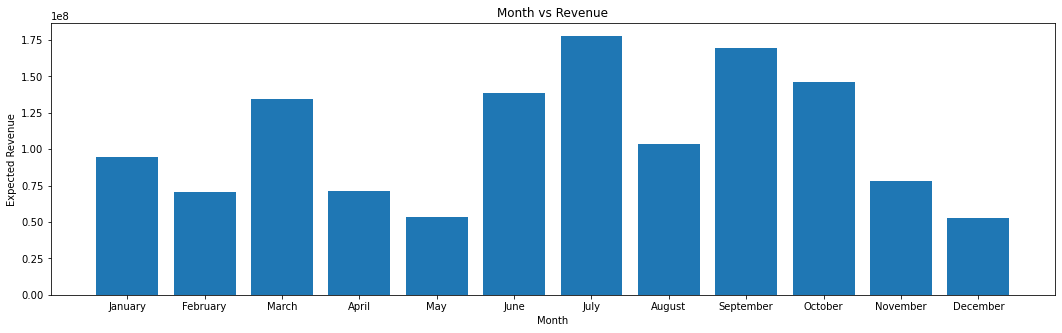

In [151]:
import calendar
Month_name=list(calendar.month_name[1:])
f, ax = plt.subplots(figsize=(18,5))
plt.bar(Month_name, rev_pro, tick_label = Month_name)
plt.title('Month vs Revenue')
plt.xlabel('Month')
plt.ylabel('Expected Revenue')

#### From this chart, we can see that July and September have the highest expected average Revenue for movie releases

### Research Question 3 : Most Frequent Cast

#### We need to know the most Frequent cast 

In [141]:
cast_count = split_column_values(df_movies['cast'])
cast_count.head()

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

In [142]:
print('{} has the most casting count with {}'.format(cast_count.index[0],cast_count[0]))

Robert De Niro has the most casting count with 52


### Research Question 4 : Features for Succesful Movies Criteria

#### We need to filter the dataset to get only the movies with average rating above 7

In [143]:
df_rate_above_7=df_movies.query('vote_average > 7')
df_rate_above_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 10822
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                522 non-null    int64         
 1   revenue               522 non-null    int64         
 2   profit                522 non-null    int64         
 3   original_title        522 non-null    object        
 4   cast                  521 non-null    object        
 5   director              522 non-null    object        
 6   runtime               522 non-null    int64         
 7   genres                522 non-null    object        
 8   production_companies  517 non-null    object        
 9   release_date          522 non-null    datetime64[ns]
 10  vote_count            522 non-null    int64         
 11  vote_average          522 non-null    float64       
 12  release_year          522 non-null    int64         
 13  month_name        

#### Average Budget of the selected movies

In [144]:
aver_Budget = df_rate_above_7['budget'].mean()
aver_Budget

38655328.52681992

####  Average Revenue of the selected movies

In [145]:
df_rate_above_7['revenue'].mean()

193090671.22988507

####  Average Duration of the selected movies

In [146]:
df_rate_above_7['runtime'].mean()

121.955938697318

####  Most Frequent Cast for the rated movies over 7

In [147]:
cast_count = split_column_values(df_rate_above_7['cast'])
cast_count.head()

Tom Hanks            14
Robert De Niro       12
Leonardo DiCaprio    11
Al Pacino            11
Samuel L. Jackson    10
dtype: int64

####  Most Frequent Genres for the rated movies over 7

In [148]:
genres_count = split_column_values(df_rate_above_7['genres'])
genres_count.head()

Drama       339
Thriller    130
Comedy      112
Action      112
Crime       109
dtype: int64

<a id='conclusions'></a>
## Conclusions

For a Movie to be in successful criteria with expected average rating above 7

    1. Average Budget must be around 38 millon dollar.
    2. Average duration of the movie must be 120 minutes.
    3. Any one of these should be in the cast :Tom Hanks, Robert De Niro , Al Pacino , Leonardo DiCaprio ,Denzel Washington.
    4. Genre must be : Drama, Thriller, Comedy, Action, Crime.

<a id='Limitations'></a>
### Limitations
> This analysis was done considering the movies which had Average Rating above 7. 



In [149]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295